In [1]:
# Import required libraries

import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image, ImageOps
import tempfile
#from six.moves.urllib.request import urlopen
#from six import BytesIO
import os
from PIL import Image, ImageFont, ImageDraw, ImageColor
import numpy as np
import matplotlib.pyplot as plt
from draw_bounding_boxes import draw_boxes

In [2]:
# Setting up Model link
model_link = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"

In [3]:
# Download model
model = hub.load(model_link)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [4]:
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7FE0DF165190>}))

In [5]:
detector = model.signatures['default']

In [6]:
# Create path for images

image_path = os.path.join('images')
if not os.path.exists(image_path):
  os.makedirs(image_path)

In [33]:
# Defining list of Images in directory
images_dir = os.path.join('images')
imgs_in_dir = os.listdir(images_dir)
imgs_in_dir.remove(imgs_in_dir[-1])
imgs_in_dir

['WUF-pix.jpg',
 '1_Q8btCYKAjccUJ2FwaiLuXQ.jpeg',
 '92829246_4294282033922670_7174723892802486272_n.jpg']

In [24]:
# Processing Image
def load_img(img_path):

  img = tf.io.read_file(img_path)

  img = tf.image.decode_jpeg(img, channels=3)

  return img

# Runs Model and Obtains inferences
def run_detector(detector, path):

  img = load_img(path)

  convert_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

  result = detector(convert_img)

  # save the results in a dictionary
  result = {key:value.numpy() for key,value in result.items()}

  # print results
  print("Found %d objects." % len(result["detection_scores"]))

  #print(result["detection_scores"])
  #print(result["detection_class_entities"])
  #print(result["detection_boxes"])
  return result

Found 100 objects.
Found 100 objects.
Found 100 objects.


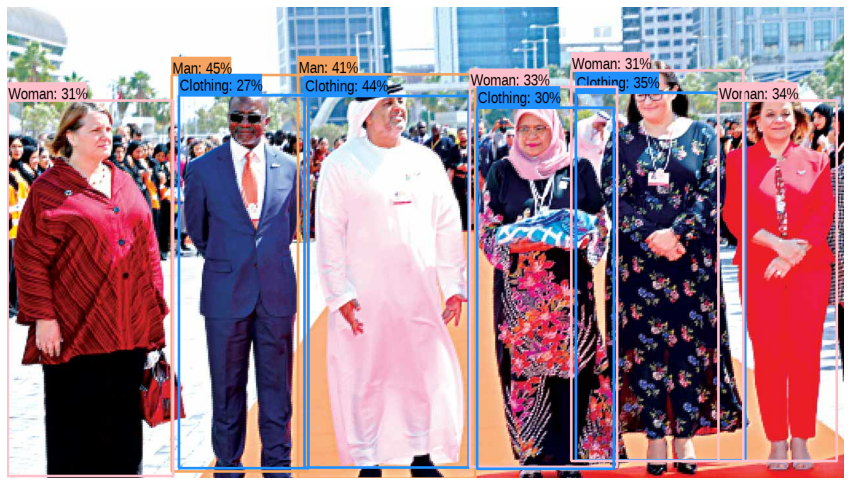

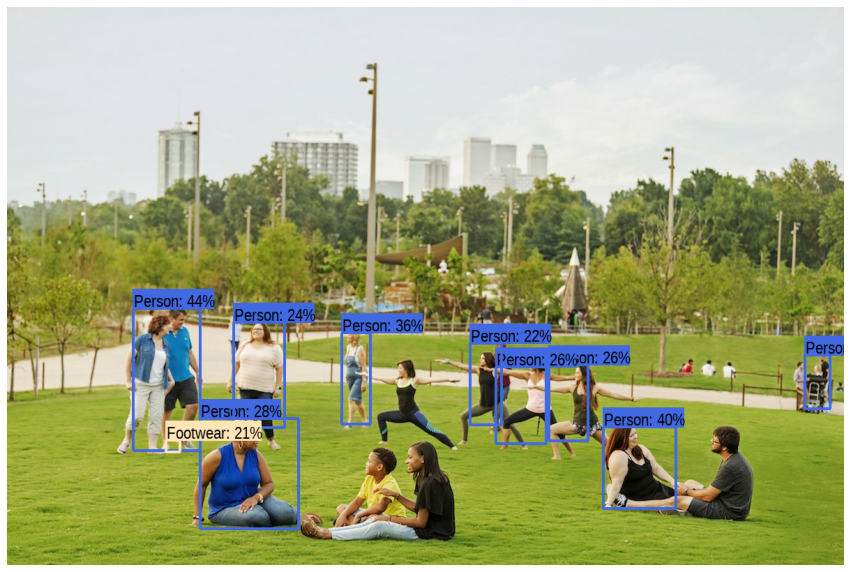

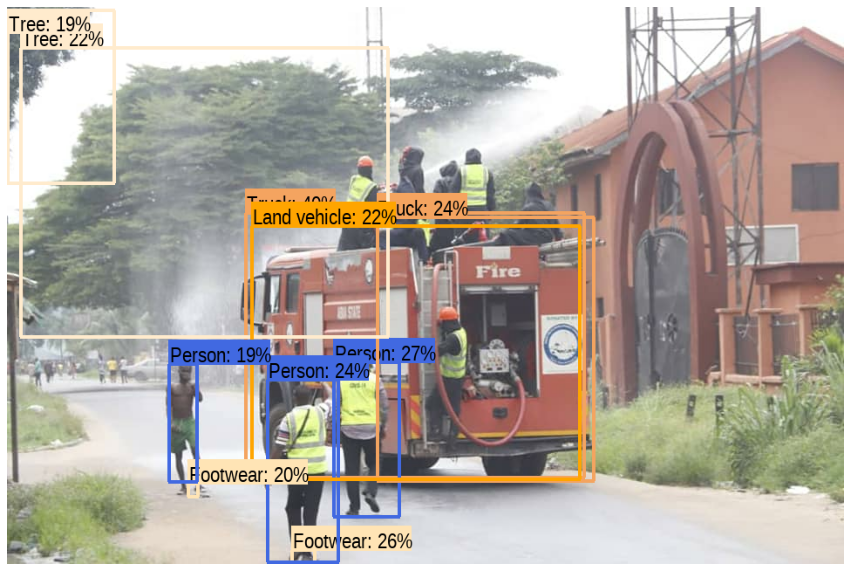

In [32]:
#Run detector for each image in directory
for im in imgs_in_dir:
  path_file = os.path.join(images_dir, im)
  detection = run_detector(detector, path_file)

  # Convert image to numpy array for visualisation function
  img_to_np = np.array(load_img(path_file))
  
  image_array = draw_boxes(image=img_to_np,
                           boxes=detection["detection_boxes"],
                           class_names=detection["detection_class_entities"],
                           scores=detection["detection_scores"])

  # Using Matplotlib to display images with bounding boxes
  plt.figure(figsize=(15,13))
  plt.axis('off')
  plt.imshow(image_array)